# <div style="text-align: center;"> Gera Gráficos: Figuras ilustrativas utilizadas no decorrer do trabalho 📊
    
<div style="text-align: justify;">
Este caderno Jupyter contém um compilado dos códigos utilizados para construção de imagens utilizadas no projeto, seja para apresentação em congresso, resumo expandido ou versão final para publicação de artigo. Os resultados finais obtidos e apresentados, com gráficos fuzzy bi e tridimensionais, se encontram no caderno principal. Todas as imagens foram feitas utilizando como ferramenta o módulo `matplotlib.pyplot`, disponível em https://matplotlib.org/stable/api/pyplot_summary.html, usando o `numpy` como ferramenta para melhor lidar com os dados.
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Representação gráfica de **quadrados mínimos**

Text(0.5, 1.0, 'Representação gráfica de Quadrados Mínimos')

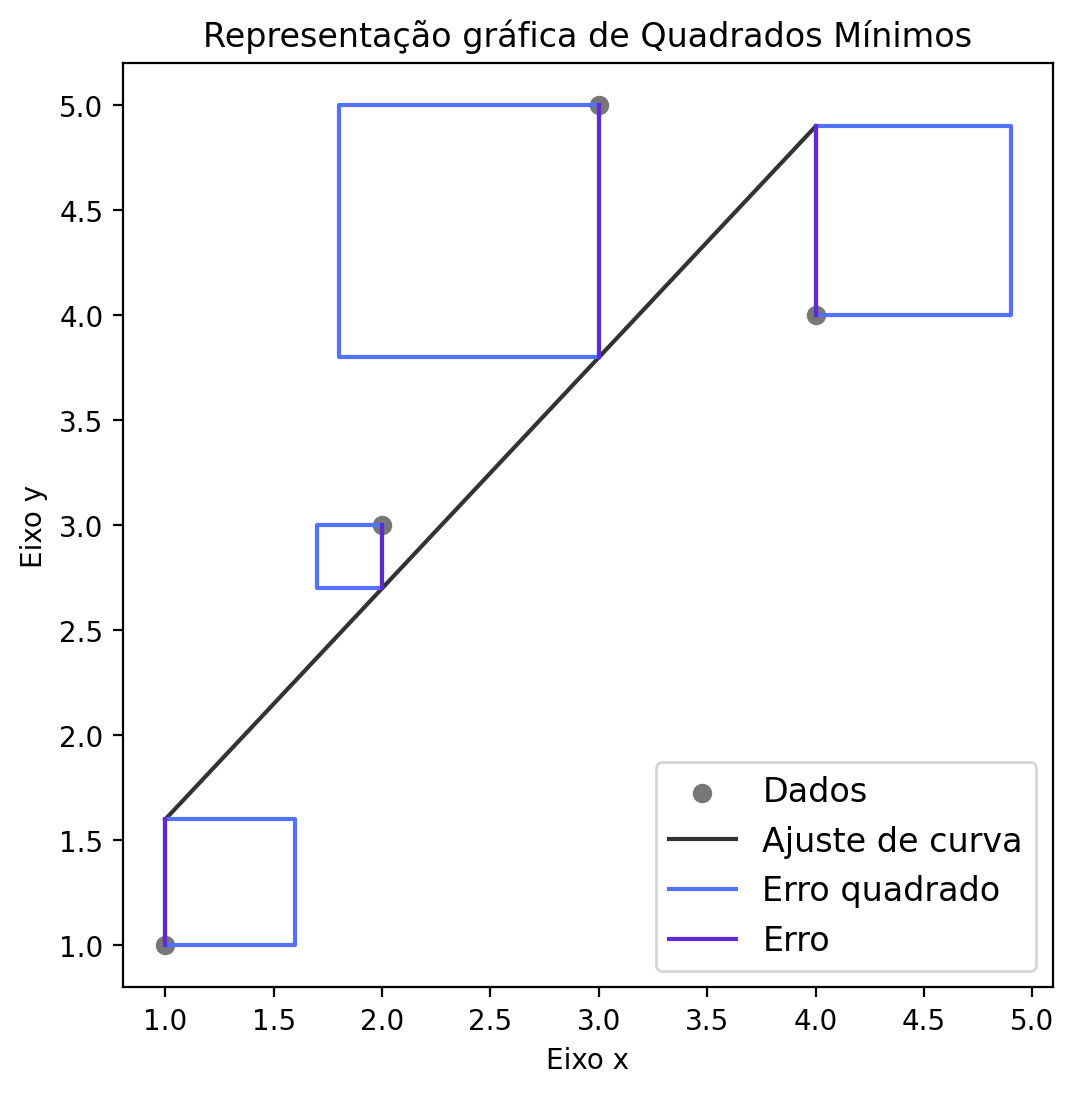

In [2]:
x_data = [1,2,3,4]
y_data = [1,3,5,4]

def phi(x_list):
    y_list = []
    for x in x_list:
        y = 0.5 + 1.1*x
        y_list.append(y)
    return y_list

ajuste = phi(x_data)
 
x_data = np.array(x_data)
y_data = np.array(y_data)
ajuste = np.array(ajuste)

erros = y_data - ajuste

#print(erros)

erro0 = [y_data[0], (y_data[0]-erros[0])]
erro1 = [y_data[1], (y_data[1]-erros[1])]
erro2 = [y_data[2], (y_data[2]-erros[2])]
erro3 = [y_data[3], (y_data[3]-erros[3])]

xe0 = [x_data[0], x_data[0]]
xe1 = [x_data[1], x_data[1]]
xe2 = [x_data[2], x_data[2]]
xe3 = [x_data[3], x_data[3]]

dado0 = [y_data[0], (y_data[0]-erros[0]), (y_data[0]-erros[0]), y_data[0], y_data[0]]
dado1 = [y_data[1], (y_data[1]-erros[1]),(y_data[1]-erros[1]), y_data[1], y_data[1]]
dado2 = [y_data[2], (y_data[2]-erros[2]),(y_data[2]-erros[2]), y_data[2], y_data[2]]
dado3 = [y_data[3], (y_data[3]-erros[3]),(y_data[3]-erros[3]), y_data[3], y_data[3]]

x0 = [x_data[0], x_data[0],(x_data[0]-erros[0]), (x_data[0]-erros[0]), x_data[0]]
x1 = [x_data[1], x_data[1],(x_data[1]-erros[1]), (x_data[1]-erros[1]), x_data[1]]
x2 = [x_data[2], x_data[2],(x_data[2]-erros[2]), (x_data[2]-erros[2]), x_data[2]]
x3 = [x_data[3], x_data[3],(x_data[3]-erros[3]), (x_data[3]-erros[3]), x_data[3]]

plt.figure(figsize=(6,6), dpi=200)

plt.scatter(x_data,y_data, color = "#777777", label =  "Dados")
plt.plot(x_data,ajuste, color = "#333333", label = "Ajuste de curva")

plt.plot(x0,dado0, color = "#5271ff", label = "Erro quadrado")
plt.plot(x1,dado1, color = "#5271ff")
plt.plot(x2,dado2, color = "#5271ff")
plt.plot(x3,dado3, color = "#5271ff")

plt.plot(xe0,erro0, color = "#5f2ad5", label = "Erro")
plt.plot(xe1,erro1, color = "#5f2ad5")
plt.plot(xe2,erro2, color = "#5f2ad5")
plt.plot(xe3,erro3, color = "#5f2ad5")

plt.legend(fontsize=12)
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")
plt.title("Representação gráfica de Quadrados Mínimos")

#plt.savefig(f"Representação gráfica de Quadrados Mínimos") #descomente esta linha para baixar a imagem

### 2. Exemplo de soma fuzzy otimista

In [3]:
def soma_fuzzy (x1,x2):
    
    soma = []
    
    a = x1[0]
    b = x1[1]
    c = x1[2]
    
    d = x2[0]
    e = x2[1]
    f = x2[2]
    
    diam_x1 = c - a
    diam_x2 = f - d
    
    s_picos = b+e
    s_meios = c+d
    s_extremos = a+f

    if diam_x1 >= diam_x2:
        soma.append(min(s_extremos, s_picos))
        soma.append(s_picos)
        soma.append(max(s_picos, s_meios))
    elif diam_x1 <= diam_x2:
        soma.append(min(s_picos, s_meios))
        soma.append(s_picos)
        soma.append(max(s_extremos, s_picos))
        
    soma = tuple(soma)
    
    return soma             

Text(0, 0.5, 'Função de pertinência')

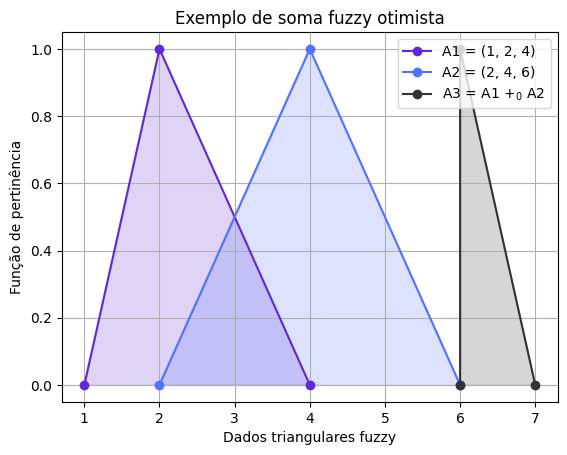

In [4]:
A1 = (1,2,4)
A2 = (2,4,6)

A3 =  soma_fuzzy(A1,A2)

pertinencia = [0,1,0]

plt.plot(A1, pertinencia, color='#5f2ad5', marker="o", label = f"A1 = {A1}")
plt.plot(A2, pertinencia, color='#5271ff', marker="o", label = f"A2 = {A2}")
plt.plot(A3, pertinencia, color='#333333', marker="o", label = "A3 = A1 $+_0$ A2")

plt.fill_between(A1, 0, pertinencia, color="#5f2ad5", alpha=0.2)
plt.fill_between(A2, 0, pertinencia, color="#5271ff", alpha=0.2)
plt.fill_between(A3, 0, pertinencia, color="#333333", alpha=0.2)

plt.grid(True)
plt.legend(loc='upper right')#, bbox_to_anchor=(1, 0), borderaxespad=0.5)
plt.title ("Exemplo de soma fuzzy otimista")
plt.xlabel("Dados triangulares fuzzy")
plt.ylabel("Função de pertinência")

#plt.savefig("Exemplo de soma fuzzy otimista") #descomente esta linha para baixar a imagem

### 3. Construção de dados fuzzy (grau 1)

In [5]:
def regressao_linear_simples(x, y):
    media_x = np.mean(x)
    media_y = np.mean(y)

    beta_1 = sum((x - media_x) * (y - media_y)) / sum((x - media_x) ** 2)
    beta_0 = media_y - beta_1 * media_x

    return beta_0, beta_1

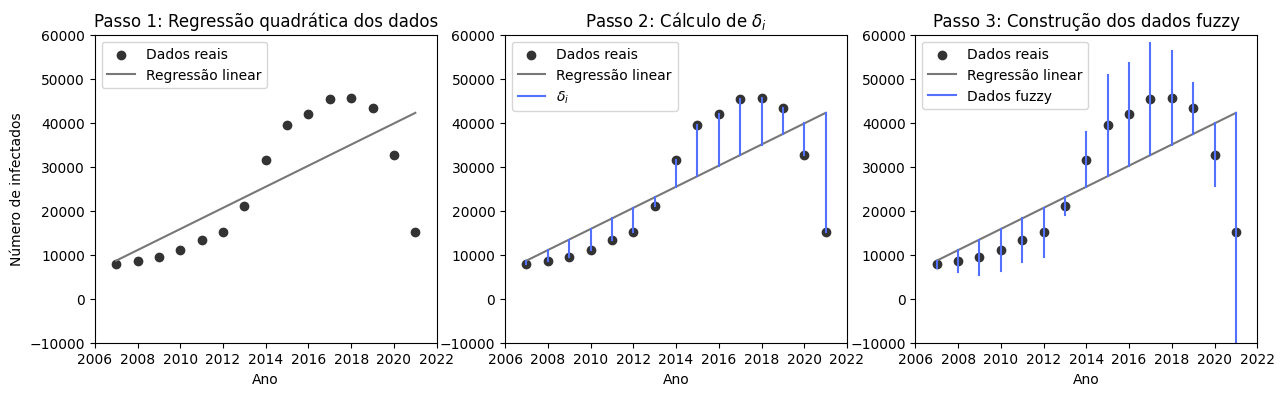

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

x_ticks = np.arange(0, 15)
x_non_ticks = np.arange(2007, 2022)

data = [0.7872*(10**4), 0.8617*(10**4), 0.9430*(10**4), 1.1099*(10**4), 1.3289*(10**4), 1.5096*(10**4), 2.1071*(10**4), 3.1620*(10**4), 3.9375*(10**4), 4.1927*(10**4), 4.5421*(10**4), 4.5685*(10**4), 4.3292*(10**4), 3.2687*(10**4), 1.5212*(10**4)]

data_2 = [
    [(0.7872*(10**4),0.8651*(10**4))],    
    [(0.8617*(10**4),1.1050*(10**4))],    
    [(0.9430*(10**4),1.3449*(10**4))],    
    [(1.1099*(10**4),1.5849*(10**4))],    
    [(1.3289*(10**4),1.8248*(10**4))],    
    [(1.5096*(10**4),2.0648*(10**4))],    
    [(2.1071*(10**4), 2.3047*(10**4))],
    
    [(2.5446*(10**4),3.1620*(10**4))],    
    [(2.7846*(10**4), 3.9375*(10**4))],    
    [(3.0245*(10**4), 4.1927*(10**4))],    
    [(3.2644*(10**4), 4.5421*(10**4))],    
    [(3.5044*(10**4), 4.5685*(10**4))],    
    [(3.7443*(10**4), 4.3292*(10**4))],
    
    [(3.2687*(10**4), 3.9842*(10**4))],
    [(1.5212*(10**4), 4.2242*(10**4))]]

data_3 =[
    [(0.7093*(10**4),0.7872*(10**4),0.8651*(10**4))],    
    [( 0.6184*(10**4), 0.8617*(10**4),1.1050*(10**4))],    
    [(0.5411*(10**4), 0.9430*(10**4),1.3449*(10**4))],    
    [(0.6349*(10**4), 1.1099*(10**4),1.5849*(10**4))],    
    [(0.8330*(10**4),1.3289*(10**4),1.8248*(10**4))],    
    [(0.9544*(10**4),1.5096*(10**4),2.0648*(10**4))],    
    [(1.9095*(10**4),2.1071*(10**4), 2.3047*(10**4))],    
    [(2.5446*(10**4),3.1620*(10**4),3.7794*(10**4))],    
    [(2.7846*(10**4), 3.9375*(10**4),5.0904*(10**4))],    
    [(3.0245*(10**4), 4.1927*(10**4), 5.3609*(10**4))],    
    [(3.2644*(10**4), 4.5421*(10**4), 5.8198*(10**4))],    
    [(3.5044*(10**4), 4.5685*(10**4), 5.6326*(10**4))],    
    [(3.7443*(10**4), 4.3292*(10**4), 4.9141*(10**4))],
    [(2.5532*(10**4), 3.2687*(10**4), 3.9842*(10**4))],
    [(-1.1818 *(10**4), 1.5212*(10**4), 4.2242*(10**4))]]

#plt.figure(figsize=(8,6), dpi=100)

b0,b1 = regressao_linear_simples(x_non_ticks, data)

curva = [b0+b1*x_non_ticks[0],b0+b1*x_non_ticks[-1]]

ax1.scatter(x_non_ticks,data, color = "#333333", label =  "Dados reais")
ax1.plot([x_non_ticks[0],x_non_ticks[-1]], curva, color = "#777777", label = "Regressão linear")
ax1.set_title("Passo 1: Regressão quadrática dos dados")
ax1.set_ylabel('Número de infectados')
ax1.set_xlabel("Ano")
ax1.set_xlim(2006,2022)
ax1.set_ylim(-10000,60000)
ax1.legend(loc='upper left')

ax2.scatter(x_non_ticks,data, color = "#333333", label =  "Dados reais")
ax2.plot([x_non_ticks[0],x_non_ticks[-1]], curva, color = "#777777", label = "Regressão linear")
for i in range(len(data_2)):
    ax2.plot([x_non_ticks[i], x_non_ticks[i]], [data_2[i][0][0], data_2[i][0][1]], color="#5271ff")
ax2.plot([],[], color ="#5271ff", label = f"$\delta_i$")
ax2.set_title("Passo 2: Cálculo de $\delta_{i}$")
ax2.set_xlabel("Ano")
ax2.set_xlim(2006,2022)
ax2.set_ylim(-10000,60000)
ax2.legend(loc='upper left')

ax3.scatter(x_non_ticks,data, color = "#333333", label =  "Dados reais")
ax3.plot([x_non_ticks[0],x_non_ticks[-1]], curva, color = "#777777", label = "Regressão linear")
for i in range(len(data_2)):
    ax3.plot([x_non_ticks[i], x_non_ticks[i]], [data_3[i][0][0], data_3[i][0][2]], color="#5271ff")
ax3.plot([],[], color ="#5271ff", label = f"Dados fuzzy")
ax3.set_title("Passo 3: Construção dos dados fuzzy")
ax3.set_xlabel("Ano")
ax3.set_xlim(2006,2022)
ax3.set_ylim(-10000,60000)
ax3.legend(loc='upper left')


#fig.savefig(f"Construção de dados fuzzy (grau 1)") #descomente esta linha para baixar a imagem

### 4. Construção de dados fuzzy (grau 2)

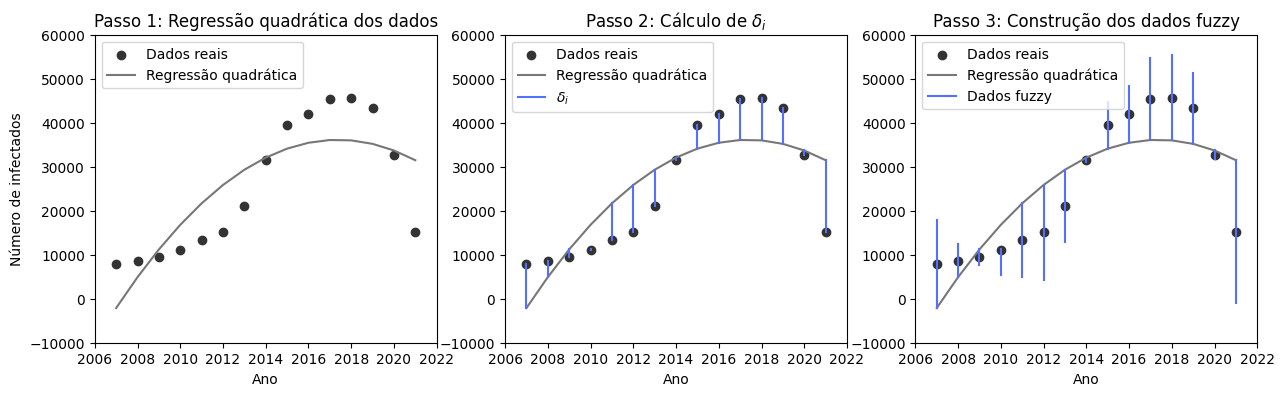

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

x_ticks = np.arange(0, 15)
x_non_ticks = np.arange(2007, 2022)

data = [0.7872*(10**4), 0.8617*(10**4), 0.9430*(10**4), 1.1099*(10**4), 1.3289*(10**4), 1.5096*(10**4), 2.1071*(10**4), 3.1620*(10**4), 3.9375*(10**4), 4.1927*(10**4), 4.5421*(10**4), 4.5685*(10**4), 4.3292*(10**4), 3.2687*(10**4), 1.5212*(10**4)]

data_2 = [
    [(-0.2109*(10**4),0.7872*(10**4))],
    [( 0.4902*(10**4), 0.8617*(10**4))],
    [( 0.9430*(10**4),1.1203*(10**4))],
    [(1.1099*(10**4),1.1203*(10**4))],
    [(1.3289*(10**4),2.1677*(10**4))],
    [(1.5096*(10**4),2.5850*(10**4))],
    [(2.1071*(10**4), 2.9314*(10**4))],
    [(3.1620*(10**4),3.2068*(10**4))],
    [(3.4112*(10**4), 3.9375*(10**4))],
    [(3.5448*(10**4), 4.1927*(10**4))],
    [(3.6073*(10**4), 4.5421*(10**4))],
    [(3.5990 *(10**4), 4.5685*(10**4))],
    [(3.5196*(10**4), 4.3292*(10**4))],
    [(3.2687*(10**4), 3.3694*(10**4))],
    [(1.5212*(10**4), 3.1482*(10**4))]
]

data_3 =[
    [(-0.2109*(10**4),0.7872*(10**4),1.7853*(10**4))],
    [( 0.4902*(10**4), 0.8617*(10**4),1.2332*(10**4))],
    [(0.7657*(10**4), 0.9430*(10**4),1.1203*(10**4))],
    [(0.5403*(10**4), 1.1099*(10**4),1.1203*(10**4))],
    [(0.4901*(10**4),1.3289*(10**4),2.1677*(10**4))],
    [(0.4342*(10**4),1.5096*(10**4),2.5850*(10**4))],
    [(1.2828*(10**4),2.1071*(10**4), 2.9314*(10**4))],
    [(3.1172*(10**4),3.1620*(10**4),3.2068*(10**4))],
    [(3.4112*(10**4), 3.9375*(10**4),4.4638*(10**4))],
    [(3.5448*(10**4), 4.1927*(10**4), 4.8406*(10**4))],
    [(3.6073*(10**4), 4.5421*(10**4), 5.4769*(10**4))],
    [(3.5990 *(10**4), 4.5685*(10**4), 5.5380*(10**4))],
    [(3.5196*(10**4), 4.3292*(10**4), 5.1388*(10**4))],
    [(3.1680*(10**4), 3.2687*(10**4), 3.3694*(10**4))],
    [( -0.1058*(10**4), 1.5212*(10**4), 3.1482*(10**4))]]

#plt.figure(figsize=(8,6), dpi=100)

coef = np.polyfit(x_non_ticks, data,2 )

polinomio = np.poly1d(coef)

curva = polinomio(x_non_ticks)

ax1.scatter(x_non_ticks,data, color = "#333333", label =  "Dados reais")
ax1.plot(x_non_ticks, curva, color = "#777777", label = "Regressão quadrática")
ax1.set_title("Passo 1: Regressão quadrática dos dados")
ax1.set_ylabel('Número de infectados')
ax1.set_xlabel("Ano")
ax1.set_xlim(2006,2022)
ax1.set_ylim(-10000,60000)
ax1.legend(loc='upper left')

ax2.scatter(x_non_ticks,data, color = "#333333", label =  "Dados reais")
ax2.plot(x_non_ticks, curva, color = "#777777",  label = "Regressão quadrática")
for i in range(len(data_2)):
    ax2.plot([x_non_ticks[i], x_non_ticks[i]], [data_2[i][0][0], data_2[i][0][1]], color="#5271ff")
ax2.plot([],[], color ="#5271ff", label = f"$\delta_i$")
ax2.set_title("Passo 2: Cálculo de $\delta_{i}$")
ax2.set_xlabel("Ano")
ax2.set_xlim(2006,2022)
ax2.set_ylim(-10000,60000)
ax2.legend(loc='upper left')

ax3.scatter(x_non_ticks,data, color = "#333333", label =  "Dados reais")
ax3.plot(x_non_ticks, curva, color = "#777777", label = "Regressão quadrática")
for i in range(len(data_2)):
    ax3.plot([x_non_ticks[i], x_non_ticks[i]], [data_3[i][0][0], data_3[i][0][2]], color="#5271ff")
ax3.plot([],[], color ="#5271ff", label = f"Dados fuzzy")
ax3.set_title("Passo 3: Construção dos dados fuzzy")
ax3.set_xlabel("Ano")
ax3.set_xlim(2006,2022)
ax3.set_ylim(-10000,60000)
ax3.legend(loc='upper left')


#fig.savefig(f"Construção de dados fuzzy (grau 2)") #descomente esta linha para baixar a imagem